In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import cluster, metrics # these will be useful
from sklearn import decomposition, metrics # these will be useful

# read in the data
file_name = '3_Final_data_ave_functions_by_drugs_temp.csv'

data = pd.read_csv(file_name, index_col = 0)

## 1 - K-means clustering method ##

1.1 algorithm: lloyd

In [2]:
#transpose the data
data_T = data.copy()
data_T = data_T.T
kmeans = cluster.KMeans(n_clusters=7, random_state=0).fit(data_T)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


visualize clustering results

In [3]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

def PCA_cluster_plot(data, cluster_labels, ax = None):
    """
    Parameters:
        data: the pd.DataFrame of gene expression data
        cluster_labels: a pd.Series with a cluster label
            for each column of data
        ax: if None, draw a new figure. else, populate these axes.
    Returns:
        ax: the plt.axes object of a PCA plot labeled by cluster
    """
    
    # check for bad input
    if isinstance(cluster_labels, pd.Series):
        if not(cluster_labels.index.equals(data.columns)):
            raise ValueError('cluster_labels.index doesn\'t match data.columns')
    else:
        raise TypeError('cluster_labels isn\'t a pd.Series')
    
    # compute PCA, save as dataframe with condition labels
    data_norm = stats.zscore(data, axis=1)
    data_pc = PCA().fit_transform(data_norm.T)
    data_pc = pd.DataFrame(data_pc, index = data.columns)
    
    # get the unique clusters (supports naming if desired)
    unique_clusters = np.sort(cluster_labels.unique())
    
    # prepare a long list of colors
    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
              'tab:brown','tab:pink','tab:gray','tab:olive', 'tab:cyan',
              'black', 'salmon', 'chocolate', 'orange', 'gold', 'lawngreen',
              'turquoise', 'steelblue', 'navy', 'violet', 'deeppink',
              'firebrick', 'sandybrown','olivedrab','darkgreen', 'aqua',
              'slategray', 'blue', 'fuschia', 'pink']
    
    # this code only runs if you have a ton of labels
    while len(colors) < len(cluster_labels.unique()):
        colors = colors + colors
    
    # make the plot
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_xlabel('PC1', fontsize = 16)
    ax.set_ylabel('PC2', fontsize = 16)
    
    # iterate through each cluster label
    for clust, color in zip(unique_clusters, colors):
        
        # get the samples of this cluster
        samples = cluster_labels.index[cluster_labels == clust]
        
        # add to plot
        ax.scatter(data_pc.loc[samples, 0],
                   data_pc.loc[samples, 1],
                   label = clust, color = color)
    
    # add legend
    ax.legend(bbox_to_anchor = (1,1))
    
    return ax

Text(0.5, 1.0, '1.1 k-means clustering lloyd algorithm')

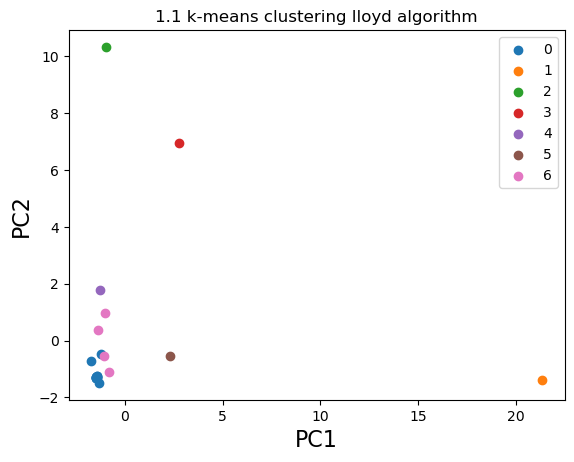

In [5]:
# visualize the results
labels = pd.Series(kmeans.labels_,data.columns)
PCA_cluster_plot(data, labels, ax = None)
plt.title("1.1 k-means clustering lloyd algorithm")

In [6]:
print(labels)

Lapatinib                 0
Mirdametinib              6
MK-2206                   0
Nintedanib                3
Pertuzumab                0
Pictilisib                5
Refametinib               0
Rituximab                 0
Romidepsin                4
Selumetinib               6
SHP099 dihydrochloride    2
Staurosporine             0
Afatinib                  0
AZD-4547                  0
AZD-8055                  1
Bortezomib                0
Carfilzomib               0
CUDC-101                  6
Curcumin                  0
Dactolisib                0
Dasatinib                 0
Gefitinib                 0
Imatinib                  6
dtype: int32


In [7]:
a = labels.index.tolist()
b = labels.tolist()
for i in range(len(a)):
    if b[i] == 6:
        print(a[i])

Mirdametinib
Selumetinib
CUDC-101
Imatinib


1.2 k-means clustering elkan method, no difference

In [9]:
kmeans2 = cluster.KMeans(n_clusters=7, random_state=0,algorithm = 'elkan').fit(data_T)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '1.2 k-means clustering elkan algorithm')

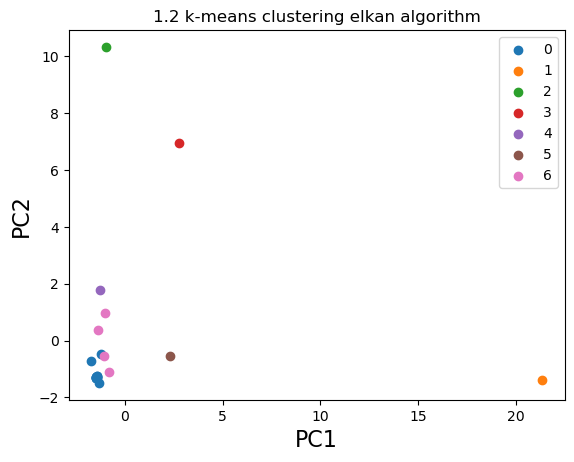

In [10]:
# visualize the results
labels2 = pd.Series(kmeans2.labels_,data.columns)
PCA_cluster_plot(data, labels2, ax = None)
plt.title("1.2 k-means clustering elkan algorithm")

## 2- Elbow method with silhouette_score ##

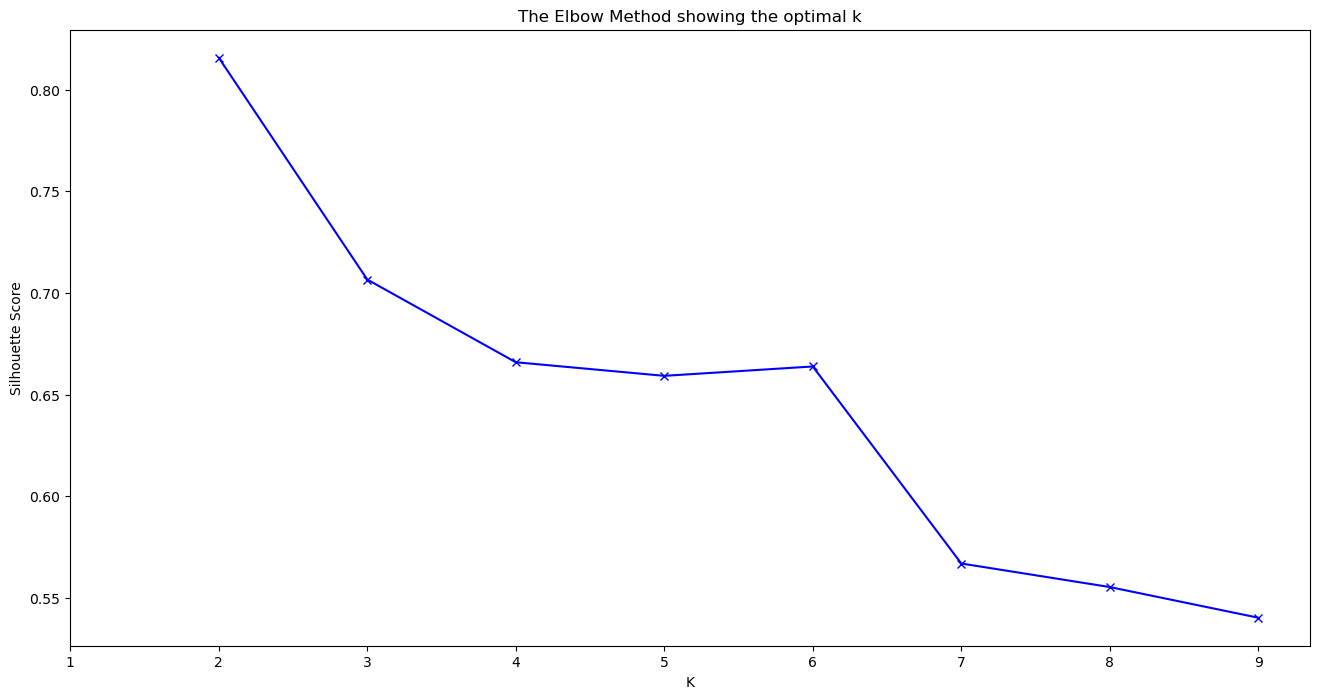

This graph doesn't seem to have a very obvious inflection point, but 27 seems to be the closest thing to it.


In [11]:
# code taken from scikit example 
# https://scikit-learn.org/stable/about.html#citing-scikit-learn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

silhouette_scores = []

for i in range(2,10):
    clusterer = cluster.KMeans(n_clusters=i, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data_T)
    silhouette_avg = silhouette_score(data_T, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(16,8))
plt.plot(range(2,10), silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.xticks(range(1,10))
plt.title('The Elbow Method showing the optimal k')
plt.show()

2.2 use elkan method to attempt elbow method again

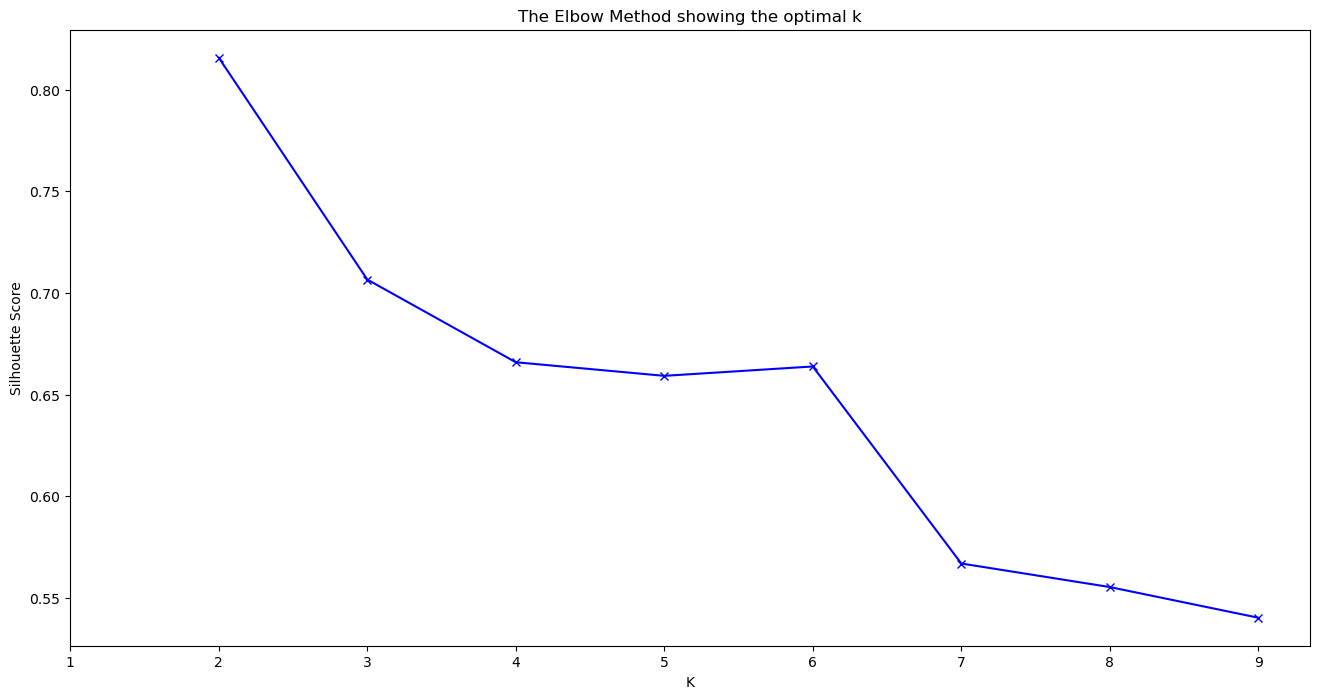

In [12]:

silhouette_scores = []

for i in range(2,10):
    clusterer = cluster.KMeans(n_clusters=i, n_init="auto", random_state=10, algorithm = "elkan")
    cluster_labels = clusterer.fit_predict(data_T)
    silhouette_avg = silhouette_score(data_T, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(16,8))
plt.plot(range(2,10), silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.xticks(range(1,10))
plt.title('The Elbow Method showing the optimal k')
plt.show()

2.3 different distance metrics: WCSS (Within-Cluster Sum of Square)

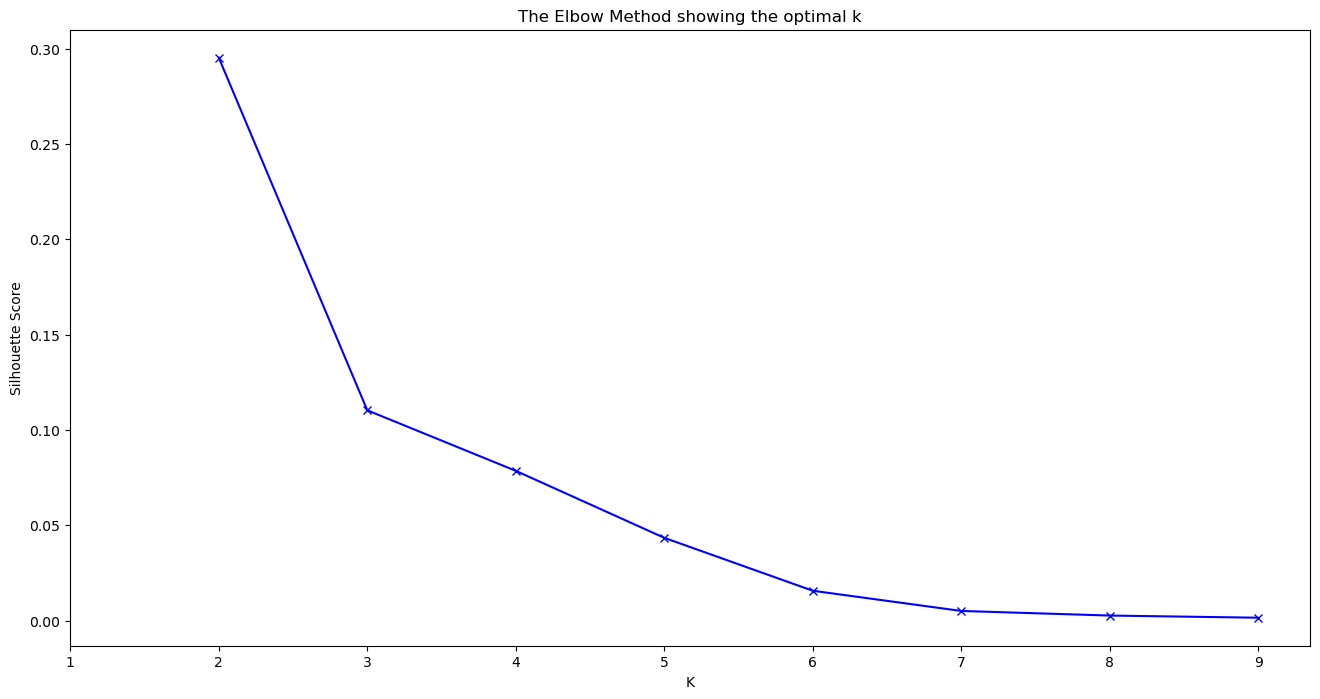

In [13]:
WCSS = []

for i in range(2,10):
    clusterer = cluster.KMeans(n_clusters=i, n_init="auto", random_state=10, algorithm = "elkan")
    cluster_labels = clusterer.fit_predict(data_T)
    WCSS.append(clusterer.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(2,10), WCSS, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.xticks(range(1,10))
plt.title('The Elbow Method showing the optimal k')
plt.show()

### 3-revisualize with k = 3 ##

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, '3.1 k-means clustering with 3 clusters')

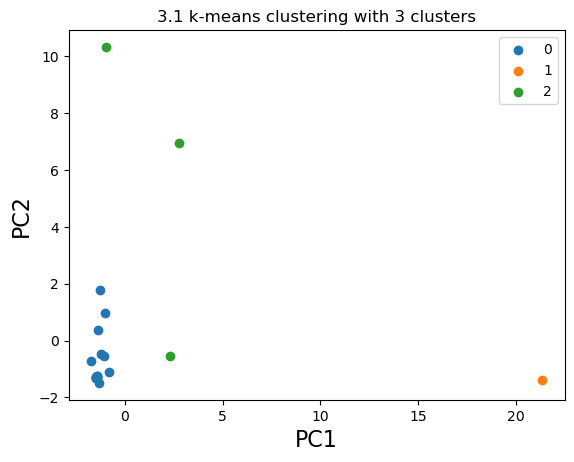

In [41]:
kmeans3 = cluster.KMeans(n_clusters=3, random_state=0).fit(data_T)
# visualize the results
labels3 = pd.Series(kmeans3.labels_,data.columns)
PCA_cluster_plot(data, labels3, ax = None)
plt.title("3.1 k-means clustering with 3 clusters")

Visualize clustering result not based on PC but pathways

In [36]:
pathway_cluster_plot(data,['Apelin','Insulin','mTOR'], labels3, ax = None)
plt.title("3.1 k-means clustering with 3 clusters")
#['Apelin','Insulin','mTOR']

/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, '3.1 k-means clustering with 3 clusters')

ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [35]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def pathway_cluster_plot(data, pathways, cluster_labels, ax = None):
    """
    Parameters:
        data: the pd.DataFrame of gene expression data
        pathways: the pathway axis
        cluster_labels: a pd.Series with a cluster label
            for each column of data
        ax: if None, draw a new figure. else, populate these axes.
    Returns:
        ax: the plt.axes object of a PCA plot labeled by cluster
    """
    
    # check for bad input
    if isinstance(cluster_labels, pd.Series):
        if not(cluster_labels.index.equals(data.columns)):
            raise ValueError('cluster_labels.index doesn\'t match data.columns')
    else:
        raise TypeError('cluster_labels isn\'t a pd.Series')
    
    # obtain the three pathways info:
    data_p = data.copy()
    data_p = data_p.loc[pathways].T
    
    # compute PCA, save as dataframe with condition labels
    #data_norm = stats.zscore(data, axis=1)
    #data_pc = PCA().fit_transform(data_norm.T)
    #data_pc = pd.DataFrame(data_pc, index = data.columns)
    
    # get the unique clusters (supports naming if desired)
    unique_clusters = np.sort(cluster_labels.unique())
    
    # prepare a long list of colors
    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
              'tab:brown','tab:pink','tab:gray','tab:olive', 'tab:cyan',
              'black', 'salmon', 'chocolate', 'orange', 'gold', 'lawngreen',
              'turquoise', 'steelblue', 'navy', 'violet', 'deeppink',
              'firebrick', 'sandybrown','olivedrab','darkgreen', 'aqua',
              'slategray', 'blue', 'fuschia', 'pink']
    
    # this code only runs if you have a ton of labels
    while len(colors) < len(cluster_labels.unique()):
        colors = colors + colors
    
    # make the plot
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_xlabel('PC1', fontsize = 16)
    ax.set_ylabel('PC2', fontsize = 16)
    
    # iterate through each cluster label
    for clust, color in zip(unique_clusters, colors):
        
        # get the samples of this cluster
        samples = cluster_labels.index[cluster_labels == clust]
        
        # add to plot
        ax.scatter(data_p.loc[samples, pathways[0]],
                   data_p.loc[samples, pathways[1]],
                   data_p.loc[samples, pathways[2]],
                   label = clust, color = color)
    
    # add legend
    ax.legend(bbox_to_anchor = (1,1))
    
    return ax

In [45]:
kmeans3 = cluster.KMeans(n_clusters=3, random_state=0).fit(data_T)
# visualize the results
labels3 = pd.Series(kmeans3.labels_,data.columns)
type(labels3)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


pandas.core.series.Series

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

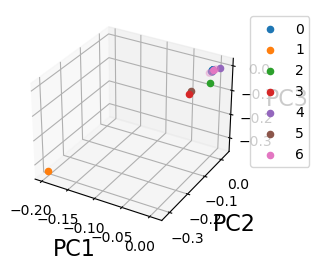

In [53]:
#pathway_cluster_plot(data,['Apelin','Insulin','mTOR'], labels3, ax = None)
kmeans3 = cluster.KMeans(n_clusters=7, random_state=0).fit(data_T)
# visualize the results
labels3 = pd.Series(kmeans3.labels_,data.columns)
cluster_labels = labels3
pathways = ['AMPK','Insulin','mTOR']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

if isinstance(cluster_labels, pd.Series):
    if not(cluster_labels.index.equals(data.columns)):
        raise ValueError('cluster_labels.index doesn\'t match data.columns')
else:
    raise TypeError('cluster_labels isn\'t a pd.Series')
    
# obtain the three pathways info:
data_p = data.copy()
data_p = data_p.loc[pathways].T
    
    # compute PCA, save as dataframe with condition labels
    #data_norm = stats.zscore(data, axis=1)
    #data_pc = PCA().fit_transform(data_norm.T)
    #data_pc = pd.DataFrame(data_pc, index = data.columns)
    
    # get the unique clusters (supports naming if desired)
unique_clusters = np.sort(cluster_labels.unique())
    
    # prepare a long list of colors
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
            'tab:brown','tab:pink','tab:gray','tab:olive', 'tab:cyan',
            'black', 'salmon', 'chocolate', 'orange', 'gold', 'lawngreen',
            'turquoise', 'steelblue', 'navy', 'violet', 'deeppink',
            'firebrick', 'sandybrown','olivedrab','darkgreen', 'aqua',
            'slategray', 'blue', 'fuschia', 'pink']
    
    # this code only runs if you have a ton of labels
while len(colors) < len(cluster_labels.unique()):
    colors = colors + colors
    
    # make the plot
ax = None
fig = plt.figure()
if ax is None:
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    #fig, ax = plt.subplots(projection = '3d')
ax.set_xlabel('PC1', fontsize = 16)
ax.set_ylabel('PC2', fontsize = 16)
ax.set_zlabel('PC3', fontsize = 16)
    
    # iterate through each cluster label
for clust, color in zip(unique_clusters, colors):
        
        # get the samples of this cluster
    samples = cluster_labels.index[cluster_labels == clust]
        
        # add to plot
    ax.scatter(data_p.loc[samples, pathways[0]],
                data_p.loc[samples, pathways[1]],
                data_p.loc[samples, pathways[2]],
                label = clust, color = color)
    
    # add legend
ax.legend(bbox_to_anchor = (1,1))
plt.show

## Agglomerative Hierarchical Clustering

### Compute Agglomerative Hierarchical Clusters

#### Create dendrograms for two linkage types

Use agglomerative clustering with single and complete linkage types and display *full* dendrograms for each. Comment on how the structure changes.

<span style="color:red">5 points</span>

In [ ]:
from scipy.cluster import hierarchy

clusters = hierarchy.linkage(data_T, method='single')
plt.figure(figsize=(8, 6))
plt.xlabel('Samples')
plt.title('Agglomerative Hierarchical Clusters with Single Linkage')
dendrogram = hierarchy.dendrogram(clusters,labels = data_T.index.tolist())
plt.show()

In [ ]:
clusters = hierarchy.linkage(data_T, method='complete')
plt.figure(figsize=(8, 6))
plt.xlabel('Samples')
plt.title('Agglomerative Hierarchical Clusters with Complete Linkage')
dendrogram = hierarchy.dendrogram(clusters,labels = data_T.index.tolist())
plt.show()

The single linkage denodrograms seem to produce more "stringy" results, while the complete linkage produce a more balanced tree structure.

#### Obtain cluster labels from dendrograms

Look at the dendrogram for your complete linkage model. Choose 2 different distance_thresholds or n_clusters, then obtain cluster labels for each. Re-use the provided PCA_cluster_plot() function from section 1.2.2 for each of these two sets of clusters. Notice how the change in threshold breaks up the clusters at each step.

<span style="color:red">10 points</span>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model_1 = AgglomerativeClustering(n_clusters=5, linkage='complete')
clustering_model_1.fit(data_T)
labels_1 = pd.Series(clustering_model_1.labels_, data.columns)

clustering_model_2 = AgglomerativeClustering(n_clusters=12, linkage='complete')
clustering_model_2.fit(data_T)
labels_2 = pd.Series(clustering_model_2.labels_, data.columns)


PCA_cluster_plot(data, labels_1, ax = None)
PCA_cluster_plot(data, labels_2, ax = None)

It seems like when we force there to be 27 clusters, it is really breaking the clusters that we have when n=5 into smaller pieces.

## Principal Component Analysis

### Describe PCA

Read ["A tutorial on Principal Component Analysis" by Jonathon Shlens](https://arxiv.org/pdf/1404.1100.pdf). Summarize:

1. The PCA workflow
2. Its practical uses
3. The weaknesses and assumptions of PCA

<span style="color:red">5 points</span>

1. The PCA workflow: obtain the original dataset and rotates the data by changing its basis vector. It's essentially an re-expression of original dataset, where the change of basis now reveals the dataset's most distinct features. Specifically, there are several ways to figure out if a speicific change of basis is "good", such as optimizing covariance matrix. Ultimately, the goal is to reduce the redudancy and increase the signal-to-noise ratio.

The article's summary on how to do PCA:
- Organize data as an m × n matrix, where m is the number of measurement types and n is the number of samples.
- Subtract off the mean for each measurement type.
- Calculate the SVD or the eigenvectors of the covariance."

2. Its practical uses: For experimentally obtained data, sometimes we record all the features and variables without knowing which ones are the most important (or maybe that a speicific relation/structure exists). PCA helps to reduce dimensions and find the ones that best represent our dataset. We are then able to have a better understanding of our dataset, and now know what are the important measurements to keep with this type of experiment.

3. Assumptions and weakness: one assumption that PCA makes it about the linearity of its dataset, meaning that it assumes a linear relationship among all of its features. Its weakness is that PCA is trying to find orthogonal axes of the dataset, which can be not practical/ideal for specific data set. In addition, PCA only removes second-order dependency in the datasets, sometimes removing higher-order dependency is necessary.

### Covariance

#### Compute and visualize the covariance matrix.

One of the major intermediate steps of computing PCA with eigendecomposition is the construction of the covariance matrix. Compute the covariance matrix for the *genes* in the *normalized* data. Visualize a clustermap of it.

Note that the diagonal values should all be equal to 1 since the data has been normalized.

<span style="color:red">5 points</span>

In [29]:
# data is already in mxn matrix according to the requirement
# normalize
norm_data = stats.zscore(data, axis=1)
# compute the covariance matrix
cov_data = np.corrcoef(norm_data)

In [ ]:
sns.clustermap(cov_data)

### PCA of the data

#### Highest weighted genes in PC 1 & PC 2

Compute PCA. List the 5 genes with the highest absolute component weighting from PC 1. Does this suggest a common theme for PC1, and if so, what might it be?

Repeat for the top 5 highest absolute weightings from PC 2.

What does it mean for a gene to be highly weighted in one of the top components?

<span style="color:red">10 points</span>

In [31]:
pca = PCA()
data_pc = pca.fit_transform(norm_data.T)
data_pc = pd.DataFrame(data_pc, index = data.columns)

In [34]:
data_pc.loc['Lapatinib',0]

-1.4397400255106767

In [30]:
# most important genes in pc1
temp = pca.components_[0].tolist()
PC1 = [abs(ele) for ele in temp]
initial_feature_names = norm_data.index.tolist()

genes_1 = []
weights_1 = []
for i in range(5):
    most_important = max(PC1)
    most_important_names = initial_feature_names[PC1.index(most_important)]
    PC1.remove(max(PC1))
    initial_feature_names.remove(most_important_names)
    genes_1.append(most_important_names)
    weights_1.append(most_important)

# most important genes in pc2
temp = pca.components_[1].tolist()
PC2 = [abs(ele) for ele in temp]
initial_feature_names = norm_data.index.tolist()

genes_2 = []
weights_2 = []
for i in range(5):
    most_important = max(PC2)
    most_important_names = initial_feature_names[PC2.index(most_important)]
    PC2.remove(max(PC2))
    initial_feature_names.remove(most_important_names)
    genes_2.append(most_important_names)
    weights_2.append(most_important)
    
print("The 5 genes with the highest absolute component weighting from PC 1 are", *genes_1)
print("The 5 genes with the highest absolute component weighting from PC 2 are", *genes_2)

AttributeError: 'PCA' object has no attribute 'components_'

#### Generate a biplot

Generate a biplot of the data, which is like a scatter plot of samples, but also includes a few arrows showing the directions of the genes that contribute most strongly to the first two components. Make sure the explained variance of the PCs are included in the axes labels.

<span style="color:red">5 points</span>

In [ ]:
# calculates explained variance
EV1 = round(pca.explained_variance_ratio_[0]*100, 2)
EV2 = round(pca.explained_variance_ratio_[1]*100, 2)
# get sample by PC1 and PC2 weights
PC1 = data_pc.iloc[:,0].tolist()
PC2 = data_pc.iloc[:,1].tolist()

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
genes_names = data.index.tolist()
columns = [str(x) for x in range(23)]
loadings_df = pd.DataFrame(loadings, genes_names, columns)

In [ ]:
arrow_1 = []
arrow_2 = []
for i in genes_1:
    arrow_1.append(loadings_df.at[i,"0"]*5)
    arrow_2.append(loadings_df.at[i,"1"]*5)
for i in genes_2:
    arrow_1.append(loadings_df.at[i,"0"]*5)
    arrow_2.append(loadings_df.at[i,"1"]*5)

In [ ]:
# make the plot
plt.xlabel("PC 1 (" + str(EV1)+ "%)", fontsize = 16)
plt.ylabel("PC 2 (" + str(EV2)+ "%)", fontsize = 16)
plt.scatter(PC1, PC2)
arrow1 = plt.arrow(0,0,arrow_1[0],arrow_2[0], head_width=.3, head_length=.3, label = genes_1[0], color = "r")
arrow2 = plt.arrow(0,0,arrow_1[1],arrow_2[1], head_width=.3, head_length=.3, label = genes_1[1], color = "g")
arrow3 = plt.arrow(0,0,arrow_1[2],arrow_2[2], head_width=.3, head_length=.3, label = genes_1[2], color = "b")
arrow4 = plt.arrow(0,0,arrow_1[5],arrow_2[5], head_width=.3, head_length=.3, label = genes_2[0], color = "c")
arrow5 = plt.arrow(0,0,arrow_1[6],arrow_2[6], head_width=.3, head_length=.3, label = genes_2[1], color = "m")
arrow6 = plt.arrow(0,0,arrow_1[7],arrow_2[7], head_width=.3, head_length=.3, label = genes_2[2], color = "y")
plt.legend([arrow1,arrow2,arrow3,arrow4,arrow5,arrow6], [genes_1[0],genes_1[1],genes_1[2],genes_2[0],genes_2[1],genes_2[2]])


#### Are any PCs correlated with growth rate?

It is interesting to see if the components of a gene expression matrix correlate with phenotypic values. The only quantitative phenotype we have available for this dataset is the growth rate (stored in `sample_table['Growth Rate (1/hr)']`). Iterate through all the PCs and see which one's sample loadings have the highest (absolute value) pearson R correlation with growth rate. Plot the relationship and discuss your results.

Growth rate is not available for all samples, so only include the samples that have a matched growth rate.

<span style="color:red">5 points</span>

In [ ]:
# only select the samples that has a growth rate
growth_samples = sample_table['Growth Rate (1/hr)'].dropna()
growth_data_pc = data_pc[data_pc.index.isin(growth_samples.index)]

In [ ]:
list1 = growth_samples.tolist()
pearson_R = []
for i in growth_data_pc.columns:
    temp = growth_data_pc[i]
    pearson_R.append(abs(np.corrcoef(list1, temp)[0, 1]))
print("The index of the PC that has the highest pearson R correlation with growth rate is ", pearson_R.index(max(pearson_R))) 

In [ ]:
fig, ax = plt.subplots()
ax.bar(range(102), pearson_R, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel("PC components")
plt.ylabel("Pearson R correlation")
plt.show()

From the graph, it seems like PC2 (index = 1) has the highest correlation when it comes to growth rate. It makes some sense if we recall the the most weighted genes in the PC2, since all of them are somewhat related to the translation of proteins. It would make sense that the translation of proteins would play an essential part in determining growth rate.
At the same time, it is interesting to observe that not all important PC has high correlation with growth rate.

### Explained Variance

#### Plot the Explained Variance

Create a plot of cumulative explained variance for the components in your PCA decomposition. How many components are necessary to explain 80% of the variance in the data?

<span style="color:red">5 points</span>

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
for i in range(1,102):
    temp = max(np.cumsum(pca.explained_variance_ratio_[0:i]))
    if temp >= 0.8:
        print(str(i) + " components is necessary to explain 80% of the variance")
        break 

#### "Denoise" your dataset

It is sometimes assumed that the least explanatory PCs are the result of experimental noise. Find the number of components needed to explain 95% of the variance in the normalized data, then remove the least explanatory components and reconstruct the normalized dataset without them.

Subtract the original normalized dataset from your reconstruction, and visualize the effect of denoising on the values. Is your visualization consistent with the removed effects being only noise?

<span style="color:red">5 points</span>

In [ ]:
for i in range(1,102):
    temp = max(np.cumsum(pca.explained_variance_ratio_[0:i]))
    if temp >= 0.95:
        print(str(i) + " components is necessary to explain 95% of the variance")
        break 


In [ ]:
# reconstruct the original dataset
recon1 = data_pc.iloc[:, range(5)].to_numpy()
recon2 = pca.components_[range(5)]
new_data = np.dot(recon1, recon2)
data_old = norm_data.T.to_numpy()
difference = new_data - data_old

In [ ]:
sns.clustermap(difference.T)
print("It seems like the matrix has pretty uniform color/value, meaning that the noise is uniformly present in every sample and gene.")
print("This is a good sign, because we probably did not denoise out some valuable information")

In [ ]:
# redo the PCA with the new dataset to see if there is a difference in clustering patterns between old and new datasets.
pca = PCA()
data_pc = pca.fit_transform(new_data)
data_pc = pd.DataFrame(data_pc, index = data.columns)

In [ ]:
# most important genes in pc1
temp = pca.components_[0].tolist()
PC1 = [abs(ele) for ele in temp]
initial_feature_names = norm_data.index.tolist()

genes_1 = []
weights_1 = []
for i in range(5):
    most_important = max(PC1)
    most_important_names = initial_feature_names[PC1.index(most_important)]
    PC1.remove(max(PC1))
    initial_feature_names.remove(most_important_names)
    genes_1.append(most_important_names)
    weights_1.append(most_important)

# most important genes in pc2
temp = pca.components_[1].tolist()
PC2 = [abs(ele) for ele in temp]
initial_feature_names = norm_data.index.tolist()

genes_2 = []
weights_2 = []
for i in range(5):
    most_important = max(PC2)
    most_important_names = initial_feature_names[PC2.index(most_important)]
    PC2.remove(max(PC2))
    initial_feature_names.remove(most_important_names)
    genes_2.append(most_important_names)
    weights_2.append(most_important)
    
print("The 5 genes with the highest absolute component weighting from PC 1 are", *genes_1)
print("The 5 genes with the highest absolute component weighting from PC 2 are", *genes_2)

In [ ]:
# calculates explained variance
EV1 = round(pca.explained_variance_ratio_[0]*100, 2)
EV2 = round(pca.explained_variance_ratio_[1]*100, 2)
# get sample by PC1 and PC2 weights
PC1 = data_pc.iloc[:,0].tolist()
PC2 = data_pc.iloc[:,1].tolist()

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
genes_names = data.index.tolist()
columns = [str(x) for x in range(27)]
loadings_df = pd.DataFrame(loadings, genes_names, columns)

In [ ]:
arrow_1 = []
arrow_2 = []
for i in genes_1:
    arrow_1.append(loadings_df.at[i,"0"]*30)
    arrow_2.append(loadings_df.at[i,"1"]*30)
for i in genes_2:
    arrow_1.append(loadings_df.at[i,"0"]*30)
    arrow_2.append(loadings_df.at[i,"1"]*30)

In [ ]:
# make the plot
plt.xlabel("PC 1 (" + str(EV1)+ "%)", fontsize = 16)
plt.ylabel("PC 2 (" + str(EV2)+ "%)", fontsize = 16)
plt.scatter(PC1, PC2)
arrow1 = plt.arrow(0,0,arrow_1[0],arrow_2[0], head_width=3, head_length=3, label = genes_1[0], color = "r")
arrow2 = plt.arrow(0,0,arrow_1[1],arrow_2[1], head_width=3, head_length=3, label = genes_1[1], color = "g")
arrow3 = plt.arrow(0,0,arrow_1[2],arrow_2[2], head_width=3, head_length=3, label = genes_1[2], color = "b")
arrow4 = plt.arrow(0,0,arrow_1[5],arrow_2[5], head_width=3, head_length=3, label = genes_2[0], color = "c")
arrow5 = plt.arrow(0,0,arrow_1[6],arrow_2[6], head_width=3, head_length=3, label = genes_2[1], color = "m")
arrow6 = plt.arrow(0,0,arrow_1[7],arrow_2[7], head_width=3, head_length=3, label = genes_2[2], color = "y")
plt.legend([arrow1,arrow2,arrow3,arrow4,arrow5,arrow6], [genes_1[0],genes_1[1],genes_1[2],genes_2[0],genes_2[1],genes_2[2]])


The PCA results from the denoised data is practically the same as the one before, except for the explained variance of PC1 and PC2 both went up. This is what we expected, because if the clustering result is significantly different, there is a chance that our denoise procedure took away important information in the dataset. The explained variance went up because with less noise, our PC1 is able to catch/recover more information in the dataset as well.